# Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

Mon Feb  8 17:11:24 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Change base dir

In [ ]:
import os
# os.chdir('/content/drive/MyDrive/upwork/sentiment_ananlysis')
os.chdir('/content/drive/MyDrive/sentiment_ananlysis')
print(os.getcwd())

/content/drive/.shortcut-targets-by-id/1JQnHYw9euroPtemHT7cR3kxtYkVRlkoY/sentiment_ananlysis


## Install

In [ ]:
!pip install -r train_requirements.txt

# Model Training

# Dataset sanity check

### Read data

In [ ]:
import pandas as pd
df  = pd.read_excel('feedback_data.xlsx')
df.head()

,feedback,positive,wow,negative
0,nothing you done was great. thank you. my.,1.0,0.0,0.0
1,the phone system kept cutting out hard to unde...,0.0,0.0,0.0
2,everything was great. samuel was very helpful....,1.0,0.0,0.0
3,everything was done great had no problem no is...,1.0,0.0,0.0
4,everything was great.,1.0,0.0,0.0


In [ ]:
df.shape

(27583, 4)

# Training Command

In [ ]:
os.getcwd()

'/content/drive/.shortcut-targets-by-id/1JQnHYw9euroPtemHT7cR3kxtYkVRlkoY/sentiment_ananlysis'

In [ ]:
!python trainer.py

2021-02-08 17:31:07.331190: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
{'base_dir': './', 'input_file': 'feedback_data.xlsx', 'feature_col': 'feedback', 'target_col': 'sentiment', 'epochs': 30, 'batch_size': 16, 'model_name': 'feedback', 'device': 'cuda', 'num_classes': 5}
Start training
Reading ................ feedback_data.xlsx
Dataset Size:  (27583, 4)
Removing duplicates from dataset
Removing null values from dataset
Classes--------------------------------
{'none': 1645, 'positive': 480, 'positive+wow': 251, 'negative': 59, 'positive+negative': 31}
Dataset Size:  (2466, 2)
----------------------------------------
----------------------------------------
{1: 1480, 2: 432, 4: 226, 0: 53, 3: 28}
----------------------------------------
{1: 165, 2: 48, 4: 25, 0: 6, 3: 3}
----------------------------------------
{0, 1, 2, 3, 4}
Number of classes:  5
100% 139/139 [00:23<00:00,  5.84it/s, accuracy=0.749, loss=0.67

## Predicion analysis

In [ ]:
import pandas as pd
class_dict = {'negative': 0, 'none': 1, 'positive': 2, 'positive+negative': 3, 'positive+wow': 4}
classes = ['negative', 'none', 'positive', 'positive+negative', 'positive+wow']
df  = pd.read_csv('feedback_data_pred.csv')
print(df.sentiment.unique())
print(df.sentiment.value_counts())
print(df.sentiment_predicted.value_counts())
df['sentiment'] = df.sentiment.apply(lambda x: class_dict[x])
df['sentiment_predicted'] = df.sentiment_predicted.apply(lambda x: class_dict[x])
df.head()

['positive' 'none' 'negative' 'positive+wow' 'positive+negative']
none                 1645
positive              480
positive+wow          251
negative               59
positive+negative      31
Name: sentiment, dtype: int64
none                 1639
positive              480
positive+wow          252
negative               69
positive+negative      26
Name: sentiment_predicted, dtype: int64


,feedback,sentiment,sentiment_predicted
0,nothing you done was great. thank you. my.,2,2
1,the phone system kept cutting out hard to unde...,1,1
2,everything was great. samuel was very helpful....,2,2
3,everything was done great had no problem no is...,2,2
4,everything was great.,2,2


Accuracy : 98.13


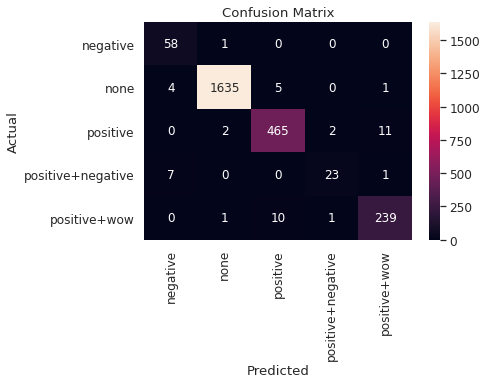

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(df.sentiment.values, df.sentiment_predicted.values)
print(f"Accuracy : {accuracy*100:.2f}")
array = confusion_matrix(df.sentiment.values, df.sentiment_predicted.values)
# print(array)
df_cm = pd.DataFrame(array, classes, classes)
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.1) # for label size
ax = sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt='d') # font size
ax.set(title="Confusion Matrix",
      xlabel="Predicted",
      ylabel="Actual",)


plt.show()


